In [1]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import pandas as pd
import json
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

D:\Softwares\Anaconda\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
df = pd.read_excel(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\Games_excel.xlsx")
df.head()

,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012",...,"['DiRT 3 delivers mud, sweat and gears the wor...","['>#50,093 in Video Games (See Top 100 in Vide...",[],Video Games,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
1,1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013",...,"['DiRT 3 delivers mud, sweat and gears the wor...","['>#50,093 in Video Games (See Top 100 in Vide...",[],Video Games,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
2,2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014",...,"['DiRT 3 delivers mud, sweat and gears the wor...","['>#50,093 in Video Games (See Top 100 in Vide...",[],Video Games,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
3,3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011",...,"['DiRT 3 delivers mud, sweat and gears the wor...","['>#50,093 in Video Games (See Top 100 in Vide...",[],Video Games,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
4,4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011",...,"['DiRT 3 delivers mud, sweat and gears the wor...","['>#50,093 in Video Games (See Top 100 in Vide...",[],Video Games,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN


### Removing these 2 rows which have an integer (0) in reviewText as a number cannot be analyzed

In [3]:
df[df['reviewText'] == 0]

,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
16574,85206,AASVZTZ9TI3VN,B000SQRYUU,Michail Chourdakis,"[57, 64]",0,5.0,Very good!,1205366400,"03 13, 2008",...,['Ghost-hunting adventure game with large cast...,"['>#52,833 in Video Games (See Top 100 in Vide...","['B000E1A4XS', 'B00OW2PEIK']",Video Games,NaN,NaN,\n\t\t ...,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
22198,127954,APFCXOFX0KUPN,B002I0HFBC,--,"[3, 6]",0,1.0,Excellent graphics but this game has a glaring...,1350345600,"10 16, 2012",...,['Chase down crime lord Charles Jericho in a r...,"['>#42,373 in Video Games (See Top 100 in Vide...","['B00KVXB5YQ', 'B01GW3LRD2', 'B00488PZ0U', 'B0...",Video Games,NaN,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}


In [4]:
df.drop([16574,22198], inplace=True)
df.reset_index(drop=True, inplace=True)

## Removing rows which have NaN value in reviewText

In [5]:
df[df['reviewText'].isna() == True]

,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
13521,62734,A12LH2100CKQO,B000EOOZ5S,God is a refuge for us (Psalms 62:8),"[0, 0]",NaN,1.0,"very dated, could not force myself to play it",1373241600,"07 8, 2013",...,['One of the most critically acclaimed games o...,"['>#83,541 in Video Games (See Top 100 in Vide...",[],Video Games,NaN,NaN,\n\t\t ...,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
25053,156277,A1A8JL75ZDZXIN,B005UI8V6C,Oddlydrawn,"[88, 90]",NaN,5.0,Fate in all its glory,1345680000,"08 23, 2012",...,"['Includes the original FATE game', 'Undiscove...",[],"['B001AH1CX6', 'B000HLP5W0', 'B002L7GKXG', 'B0...",Software,NaN,</div>,NaN,[],[],{'\n Product Dimensions: \n ': '0.6 x 4....


In [6]:
df.drop([13521,25053], inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
# Load the regular expression library
import re

# Remove punctuation
df['review_text_processed'] = df['reviewText'].map(lambda x: re.sub('[,\.!?]', '', str(x)))  # str(x) because some ele were float, so converted them to string

# Convert the titles to lowercase
df['review_text_processed'] = df['review_text_processed'].map(lambda x: x.lower())

# Print out the first rows of reviews
df['review_text_processed'].head()

0    installing the game was a struggle (because of...
1    if you like rally cars get this game you will ...
2    1st shipment received a book instead of the ga...
3    i got this version instead of the ps3 version ...
4    i had dirt 2 on xbox 360 and it was an okay ga...
Name: review_text_processed, dtype: object

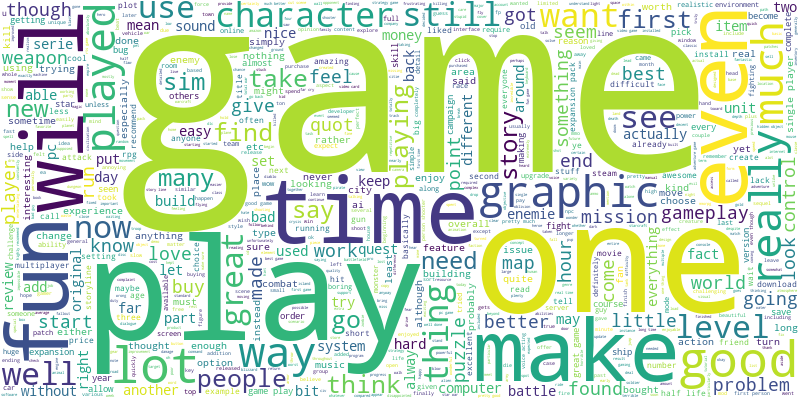

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Lemmatization()

In [9]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):  # texts is the list with 28131 reviews
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = [] 
    for text in texts:  # for every review in texts
        doc = nlp(text) # doc is sorta like tokenizing, and we also get punctuation marks as separate elements
        new_text = []  # this will be a list of lemmatized words in any review
        for token in doc: # doc is a list of tokenized words
            if token.pos_ in allowed_postags: # can also add if not token.is_punct to remove punctuations
                new_text.append(token.lemma_) 
        final = " ".join(new_text) # this is a string, all lemmatized words joined by spaces
        texts_out.append(final) # string of all the 28131 reviews will be added here
    return (texts_out)

In [10]:
data = df.review_text_processed.values.tolist() # strings of all reviews in one list

In [11]:
data

['installing the game was a struggle (because of games for windows live bugs)some championship races and cars can only be "unlocked" by buying them as an addon to the game i paid nearly 30 dollars when the game was new i don\'t like the idea that i have to keep paying to keep playingi noticed no improvement in the physics or graphics compared to dirt 2i tossed it in the garbage and vowed never to buy another codemasters game i\'m really tired of arcade style rally/racing games anywayi\'ll continue to get my fix from richard burns rally and you should to :)http://wwwamazoncom/richard-burns-rally-pc/dp/b000c97156/ref=sr_1_1ie=utf8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallythank you for reading my review if you enjoyed it be sure to rate it as helpful',
 "if you like rally cars get this game you will have funit is more oriented to &#34;european market&#34; since here in america there isn't a huge rally fan party music it is very european and even the voices from the game very &

In [12]:
lemmatized_texts = lemmatization(data)

In [13]:
data[0]

'installing the game was a struggle (because of games for windows live bugs)some championship races and cars can only be "unlocked" by buying them as an addon to the game i paid nearly 30 dollars when the game was new i don\'t like the idea that i have to keep paying to keep playingi noticed no improvement in the physics or graphics compared to dirt 2i tossed it in the garbage and vowed never to buy another codemasters game i\'m really tired of arcade style rally/racing games anywayi\'ll continue to get my fix from richard burns rally and you should to :)http://wwwamazoncom/richard-burns-rally-pc/dp/b000c97156/ref=sr_1_1ie=utf8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallythank you for reading my review if you enjoyed it be sure to rate it as helpful'

In [14]:
lemmatized_texts[0]

'instal game struggle game window live bugs)some championship race car only unlocked buy game pay nearly dollar game new like idea keep pay keep playingi notice improvement physic graphic compare toss garbage vow never buy codemaster game really tired arcade style rally racing game continue get fix burns rally pc dp b000c97156 ref sr_1_1ie = utf8&qid;=1341886844&sr;=8 1&keywords;=richard+burns+rallythank read review enjoy sure rate helpful'

## Removing stopwords, punctuation marks

In [15]:
#import gensim
#from gensim.utils import simple_preprocess
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords

stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences): # this uses simple_preprocess, which uses tokenize() internally, hence sent to words
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations and accents, like café will be converted to cafe

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [16]:
#data = df.review_text_processed.values.tolist() # strings of all reviews in one list
data_words = list(sent_to_words(lemmatized_texts))

# remove stop words
data_words = remove_stopwords(data_words)

### How all this is working

In [17]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
data_trial = ['hi! my name is suryam.', 'and this is my friend, yash, who likes to sit in a café.']

In [19]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuation marks and accents, like café will be converted to cafe
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [20]:
data_words_trial = list(sent_to_words(data_trial))
data_words_trial

[['hi', 'my', 'name', 'is', 'suryam'],
 ['and',
  'this',
  'is',
  'my',
  'friend',
  'yash',
  'who',
  'likes',
  'to',
  'sit',
  'in',
  'cafe']]

In [21]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [22]:
data_words_trial = remove_stopwords(data_words_trial)
data_words_trial

[['hi', 'name', 'suryam'], ['friend', 'yash', 'likes', 'sit', 'cafe']]

### Main dataset work resume

In [23]:
len(data_words)

28129

In [24]:
print(data_words[0])

['instal', 'game', 'struggle', 'game', 'window', 'live', 'bugs', 'championship', 'race', 'car', 'unlocked', 'buy', 'game', 'pay', 'nearly', 'dollar', 'game', 'new', 'like', 'idea', 'keep', 'pay', 'keep', 'playingi', 'notice', 'improvement', 'physic', 'graphic', 'compare', 'toss', 'garbage', 'vow', 'never', 'buy', 'codemaster', 'game', 'really', 'tired', 'arcade', 'style', 'rally', 'racing', 'game', 'continue', 'get', 'fix', 'burns', 'rally', 'pc', 'dp', 'ref', 'sr_', 'ie', 'utf', 'qid', 'sr', 'keywords', 'richard', 'burns', 'rallythank', 'read', 'review', 'enjoy', 'sure', 'rate', 'helpful']


## Unique Words and their frequency (Bag of Words)

In [25]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#### Viewing unique words and their frequency of the first review

In [26]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]
print(id_words[0])

[('arcade', 1), ('bugs', 1), ('burns', 2), ('buy', 2), ('car', 1), ('championship', 1), ('codemaster', 1), ('compare', 1), ('continue', 1), ('dollar', 1), ('dp', 1), ('enjoy', 1), ('fix', 1), ('game', 6), ('garbage', 1), ('get', 1), ('graphic', 1), ('helpful', 1), ('idea', 1), ('ie', 1), ('improvement', 1), ('instal', 1), ('keep', 2), ('keywords', 1), ('like', 1), ('live', 1), ('nearly', 1), ('never', 1), ('new', 1), ('notice', 1), ('pay', 2), ('pc', 1), ('physic', 1), ('playingi', 1), ('qid', 1), ('race', 1), ('racing', 1), ('rally', 2), ('rallythank', 1), ('rate', 1), ('read', 1), ('really', 1), ('ref', 1), ('review', 1), ('richard', 1), ('sr', 1), ('sr_', 1), ('struggle', 1), ('style', 1), ('sure', 1), ('tired', 1), ('toss', 1), ('unlocked', 1), ('utf', 1), ('vow', 1), ('window', 1)]


In [27]:
print(data_words[0])

['instal', 'game', 'struggle', 'game', 'window', 'live', 'bugs', 'championship', 'race', 'car', 'unlocked', 'buy', 'game', 'pay', 'nearly', 'dollar', 'game', 'new', 'like', 'idea', 'keep', 'pay', 'keep', 'playingi', 'notice', 'improvement', 'physic', 'graphic', 'compare', 'toss', 'garbage', 'vow', 'never', 'buy', 'codemaster', 'game', 'really', 'tired', 'arcade', 'style', 'rally', 'racing', 'game', 'continue', 'get', 'fix', 'burns', 'rally', 'pc', 'dp', 'ref', 'sr_', 'ie', 'utf', 'qid', 'sr', 'keywords', 'richard', 'burns', 'rallythank', 'read', 'review', 'enjoy', 'sure', 'rate', 'helpful']


## LDA Model

In [28]:
# Ref - https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [29]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.098*"city" + 0.072*"sim" + 0.038*"car" + 0.033*"building" + '
  '0.024*"simcity" + 0.020*"build" + 0.016*"housing" + 0.015*"sims" + '
  '0.013*"connect" + 0.012*"road"'),
 (1,
  '0.049*"new" + 0.034*"buy" + 0.018*"add" + 0.016*"expansion" + 0.015*"steam" '
  '+ 0.015*"online" + 0.014*"purchase" + 0.014*"money" + 0.014*"pay" + '
  '0.012*"server"'),
 (2,
  '0.039*"pc" + 0.028*"run" + 0.021*"version" + 0.020*"work" + 0.017*"issue" + '
  '0.017*"download" + 0.016*"problem" + 0.015*"puzzle" + 0.012*"mystery" + '
  '0.012*"controller"'),
 (3,
  '0.023*"map" + 0.023*"war" + 0.019*"battle" + 0.018*"player" + '
  '0.015*"campaign" + 0.013*"unit" + 0.012*"tank" + 0.012*"build" + '
  '0.011*"attack" + 0.011*"civilization"'),
 (4,
  '0.022*"enemy" + 0.022*"weapon" + 0.015*"kill" + 0.014*"mission" + '
  '0.011*"gun" + 0.009*"fps" + 0.009*"shoot" + 0.008*"team" + '
  '0.008*"battlefield" + 0.008*"fight"'),
 (5,
  '0.045*"character" + 0.025*"world" + 0.024*"quest" + 0.019*"level" + '
  '0.

In [30]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.008471 -0.421231       1        1  63.881841
4     -0.385097  0.084030       2        1   8.104194
1      0.318223  0.285608       3        1   8.086280
5      0.334113 -0.204914       4        1   7.078166
2      0.113800  0.069241       5        1   5.617804
3     -0.257579 -0.193011       6        1   5.607273
0     -0.131931  0.380276       7        1   1.624444, topic_info=           Term           Freq          Total Category  logprob  loglift
13         game  141999.000000  141999.000000  Default  30.0000  30.0000
28          new   12333.000000   12333.000000  Default  29.0000  29.0000
1329  character   10621.000000   10621.000000  Default  28.0000  28.0000
3           buy    8983.000000    8983.000000  Default  27.0000  27.0000
1470       city    5416.000000    5416.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
259       build     959.892956    3778.664006   Topic7  -3.9347   2.7497
322       drive     299.230422    1776.337362   Topic7  -5.1003   2.3389
35         race     274.158278    1823.537055   Topic7  -5.1878   2.2252
424       track     220.199796    1199.589219   Topic7  -5.4070   2.4248
4193     region     191.546781     680.154789   Topic7  -5.5464   2.8528

[360 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1826      1  0.261848  ability
1826      3  0.033977  ability
1826      4  0.500139  ability
1826      6  0.204314  ability
89        3  0.999622  account
...     ...       ...      ...
608       1  0.334117    world
608       4  0.665751    world
2162      2  0.999507   zombie
430       3  0.062031     zone
430       4  0.937682     zone

[481 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 2, 6, 3, 4, 1])

In [31]:
# Ref - https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)  # the higher the better

\nCoherence Score:  0.4577476353811022


In [32]:
#df.to_excel(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\Games_updated_excel.xlsx")

### Saving model and visualization in pickle file (num_topics = 7)

In [33]:
# import pickle

In [34]:
# # Saving Model
# pickle_out = open(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\Video_Games_lda.pickle", 'wb')
# pickle.dump(lda_model, pickle_out)
# pickle_out.close()

In [35]:
# pickle_in = open(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\Video_Games_lda.pickle", 'rb')
# lda_model = pickle.load(pickle_in)
# lda_model

In [36]:
#pprint(lda_model.print_topics())

In [37]:
# # Saving Visualization
# pickle_out = open(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\Video_Games_vis.pickle", 'wb')
# pickle.dump(vis, pickle_out)
# pickle_out.close()

In [38]:
# pickle_in = open(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\Video_Games_vis.pickle", 'rb')
# vis = pickle.load(pickle_in)
# #vis

### Running LDA model with different number of topics and checking their coherence

In [39]:
# # Function for training multiple models - Ref - https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     """
#     Compute c_v coherence for various number of topics

#     Parameters:
#     ----------
#     dictionary : Gensim dictionary
#     corpus : Gensim corpus
#     texts : List of input texts
#     limit : Max num of topics

#     Returns:
#     -------
#     model_list : List of LDA topic models
#     coherence_values : Coherence values corresponding to the LDA model with respective number of topics
#     """
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
#         model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=5,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha="auto")
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())

#     return model_list, coherence_values

In [40]:
# # Can take a long time to run.
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=20, step=6)

In [41]:
# model_list

In [42]:
# coherence_values

In [43]:
# # Show graph
# limit=20; start=2; step=6;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

In [44]:
# # Print the coherence scores
# for m, cv in zip(x, coherence_values):
#     print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# How many topics to each document

Ref - https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [45]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [46]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.5540,"game, play, get, time, good, make, well, reall...","[instal, game, struggle, game, window, live, b..."
1,1,6.0,0.7168,"game, play, get, time, good, make, well, reall...","[like, rally, car, get, game, funit, oriented,..."
2,2,6.0,0.6904,"game, play, get, time, good, make, well, reall...","[st, shipment, receive, book, instead, shipmen..."
3,3,6.0,0.6252,"game, play, get, time, good, make, well, reall...","[get, version, instead, version, turn, mistake..."
4,4,6.0,0.7660,"game, play, get, time, good, make, well, reall...","[dirt, okay, game, start, play, game, laptop, ..."
5,5,6.0,0.7120,"game, play, get, time, good, make, well, reall...","[overall, well, racing, game, good, graphic, t..."
6,6,6.0,0.7770,"game, play, get, time, good, make, well, reall...","[love, play, dirt, think, graphic, good, purch..."
7,7,6.0,0.6685,"game, play, get, time, good, make, well, reall...","[tell, piece, dog, game, else, work, go, take,..."
8,8,6.0,0.7190,"game, play, get, time, good, make, well, reall...","[initially, give, star, crash, constantly, rec..."
9,9,6.0,0.7410,"game, play, get, time, good, make, well, reall...","[still, figure, one, instruct, game, never, in..."


In [47]:
df['reviewText'][0]

'Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.'

In [48]:
df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 4]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
3467,3467,4.0,0.3282,"enemy, weapon, kill, mission, gun, fps, shoot,...","[good, way, get, half, life, element, price, g..."
9259,9259,4.0,0.3920,"enemy, weapon, kill, mission, gun, fps, shoot,...","[review, call, duty, gold, edition, expansion,..."


In [49]:
len(df_dominant_topic)

28129

In [50]:
df_dominant_topic['Dominant_Topic'].value_counts()

6.0    28108
2.0        8
3.0        6
1.0        3
4.0        2
5.0        2
Name: Dominant_Topic, dtype: int64

## Gensim LDA Model with Video Games 5 file sklearn lda features

In [61]:
print(lemmatized_texts[0])  # lemmatied_texts here is Cleaned_Reviews in VG5

instal game struggle game window live bugs)some championship race car only unlocked buy game pay nearly dollar game new like idea keep pay keep playingi notice improvement physic graphic compare toss garbage vow never buy codemaster game really tired arcade style rally racing game continue get fix burns rally pc dp b000c97156 ref sr_1_1ie = utf8&qid;=1341886844&sr;=8 1&keywords;=richard+burns+rallythank read review enjoy sure rate helpful


In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [68]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=0.02,
    # minimum reqd occurences of a word 
                             max_df=0.90,
    # maximum required occurences of a word
                             stop_words='english',             
    # remove stop words
                             lowercase=True,                   
    # convert all words to lowercase
                             token_pattern='[a-zA-Z]{3,}',  
    # num chars > 3
                             max_features=3000)

In [69]:
vect_text=vectorizer.fit_transform(lemmatized_texts)

In [75]:
#print(vectorizer.vocabulary_)

673

In [77]:
print(vect_text.toarray()[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 

In [84]:
#lda_model=LatentDirichletAllocation(n_components=7,learning_method='online',random_state=42,max_iter=10) # here we use gensim lda model
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)

AttributeError: 'LdaModel' object has no attribute 'fit_transform'

In [ ]:
lda_model.

In [82]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [78]:
vocab = vectorizer.get_feature_names()

In [81]:
#print(vocab)

In [83]:
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20) # print this

AttributeError: 'LdaModel' object has no attribute 'components_'